## Car Price Prediction
### INTRODUCTION
#### Objectives
The objective of this project is to to produce a regression model for predicting the selling price given the characteristics of
the cars in the historical data given.

#### About Dataset
The dataset contains an anonymised collection of adverts with information on vehicles such as brand, type, colour, mileage, as well as the selling price.

Columns Description: The following are the description of each columns in the dataset:
- public_reference: key id of vehicle
- mileage: a number of miles travelled or covered
- reg_code: a sequence of letters and numbers assigned to a motor vehicle when it is registered
- standard_colour: color of motor vehicle
- standard_make: vehicle automotive brand
- standard_model: specific model of a vehicle brand
- vehicle_condition: condition of the vehicle i.e. used or new
- year_of_registration: the year a vehicle was registration
- price: the price of the vehicle
- body_type: body type of the vehicle
- crossover_car_and_van: a boolean (yes if the vehicle is a crossover car and van or No if its not)
- fuel_type: the type of fuel consumed by the vehicle

### Preliminary Wrangling

In [203]:
#IMPORT THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.impute import SimpleImputer
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [204]:
df = pd.read_csv('adverts.csv')

In [205]:
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


### Data Exploration

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [116]:
# Checking for missing values
df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [117]:
# Checking statistical summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
public_reference,402005.0,NaN,NaN,NaN,202007077472447.78125,16916615997.343893,201307177852187.0,202009023197699.0,202009304400624.0,202010175124399.0,202011025683478.0
mileage,401878.0,NaN,NaN,NaN,37743.595656,34831.724018,0.0,10481.0,28629.5,56875.75,999999.0
reg_code,370148,72,17,36738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
standard_colour,396627,22,Black,86287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
standard_make,402005,110,BMW,37376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
standard_model,402005,1168,Golf,11583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_condition,402005,2,USED,370756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_registration,368694.0,NaN,NaN,NaN,2015.006206,7.962667,999.0,2013.0,2016.0,2018.0,2020.0
price,402005.0,NaN,NaN,NaN,17341.965799,46437.460951,120.0,7495.0,12600.0,20000.0,9999999.0
body_type,401168,16,Hatchback,167315,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**SOME INSIGHTS:**
- There are 22 unique standard colour with Black being the majority
- There are 110 unique standard make and BMW being the majority
- USED cars are the majority
- Petrol powered vehicles are the majority
- year_of_registration has values lesser than "1800"

In [118]:
# checking columns with vehicle_condition = null
df[df['vehicle_condition'] == 'NEW']['year_of_registration'].unique()

array([nan])

In [119]:
# checking for duplicated rows
df.duplicated().sum()

0

### Univariate Visualization

#### mileage

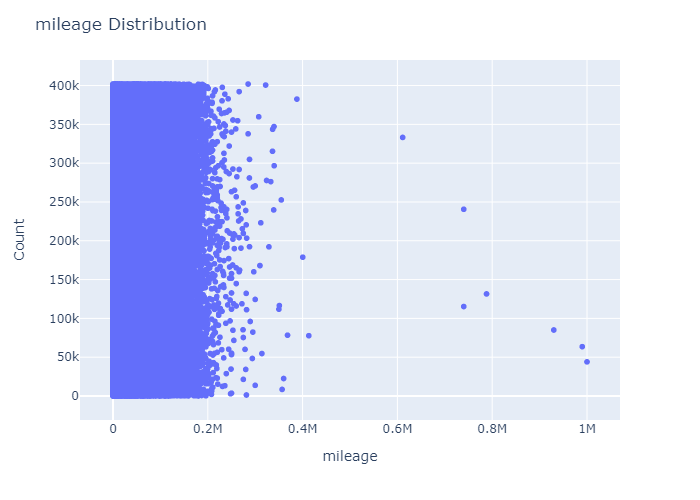

In [120]:
# Visualize mileage distribution
fig = px.scatter(df, x='mileage')

fig.update_layout(
    title = 'mileage Distribution',
    xaxis_title = 'mileage',
    yaxis_title = 'Count'
)
   
fig.show(renderer='png')

**INSIGHT:**
- Multiple outliers available
- Majority of car mileage are below 200,000

#### reg_code

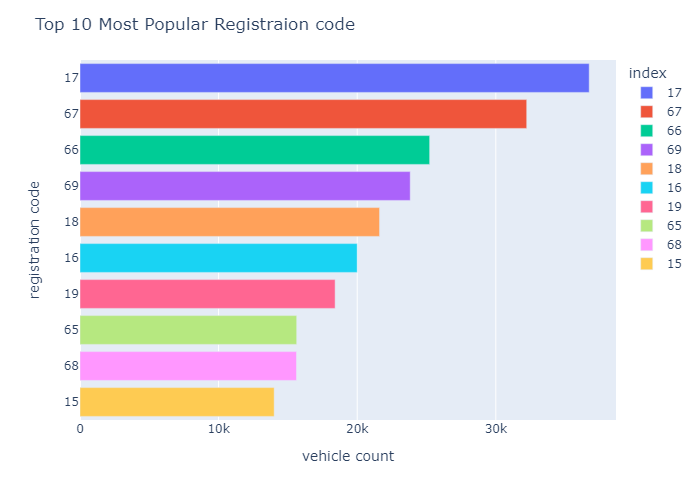

In [121]:
reg_code = df['reg_code'].value_counts()[:10]
fig = px.bar(reg_code,
             x='reg_code',
             y=reg_code.index,
             color=reg_code.index,
             template = 'plotly',
             height = 500,
            width = 700
            )

fig.update_layout(
    title = 'Top 10 Most Popular Registraion code',
    xaxis_title = 'vehicle count',
    yaxis_title = 'registration code'
)
   
fig.show(renderer='png')

**INSIGHT:**
- 17, 67, 66 respectively are the top 3 most popular registration code

#### standard_colour

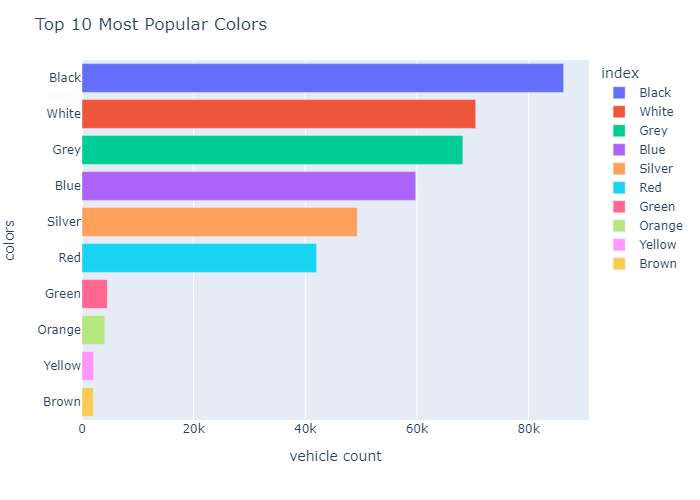

In [122]:
standard_colour = df['standard_colour'].value_counts()[:10]
fig = px.bar(standard_colour,
             x='standard_colour',
             y=standard_colour.index,
             color=standard_colour.index,
             template = 'plotly',
             height = 500,
            width = 700
            )

fig.update_layout(
    title = 'Top 10 Most Popular Colors',
    xaxis_title = 'vehicle count',
    yaxis_title = 'colors'
)
   
fig.show(renderer='png')

**INSIGHT:**
- Black, White, Grey, Blue, Silver are the top 5 most popular color 

#### standard_make

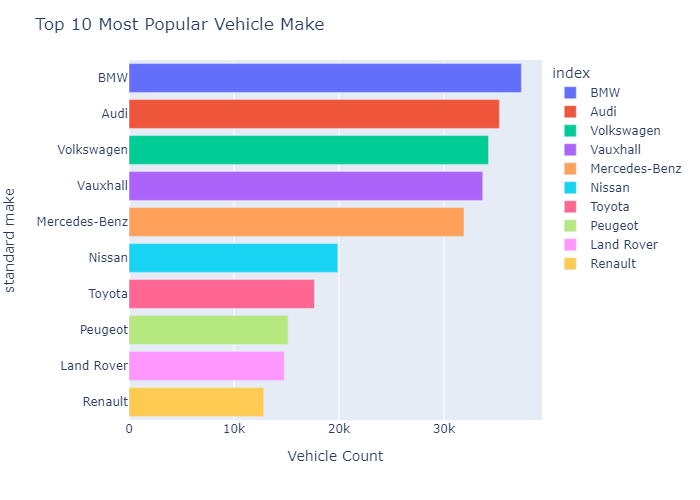

In [123]:
standard_make = df['standard_make'].value_counts()[:10]
fig = px.bar(standard_make,
             x='standard_make',
             y=standard_make.index,
             color=standard_make.index,
             template = 'plotly',
             height = 500,
            width = 700
            )

fig.update_layout(
    title = 'Top 10 Most Popular Vehicle Make',
    xaxis_title = 'Vehicle Count',
    yaxis_title = 'standard make'
)
   
fig.show(renderer='png')

**INSIGHT:**
BMW, Audi, Volswagwn, Vauxhall, Mercedes-Benz are the top 5 most popular vehicle brand

#### vehicle_condition

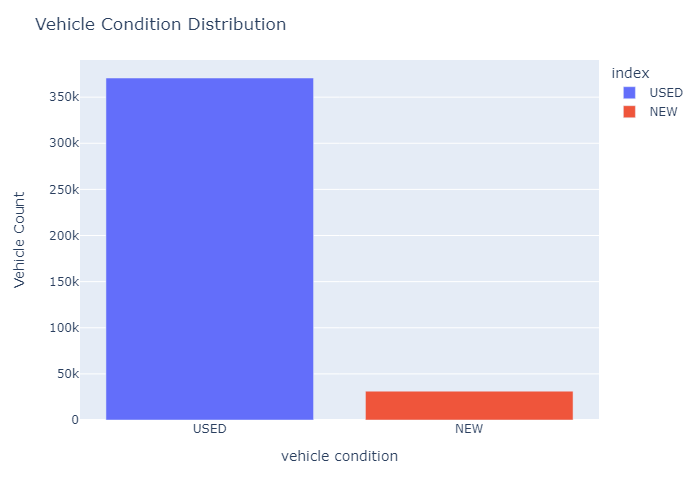

In [124]:
vehicle_condition = df['vehicle_condition'].value_counts()
fig = px.bar(vehicle_condition,
             y='vehicle_condition',
             x=vehicle_condition.index,
             color=vehicle_condition.index,
             template = 'plotly',
             height = 500,
            width = 700
            )

fig.update_layout(
    title = 'Vehicle Condition Distribution',
    yaxis_title = 'Vehicle Count',
    xaxis_title = 'vehicle condition'
)
   
fig.show(renderer='png')

**INSIGHT:**
- Majority of the vehicles in the dataset are USED vehicles

#### year_of_registration

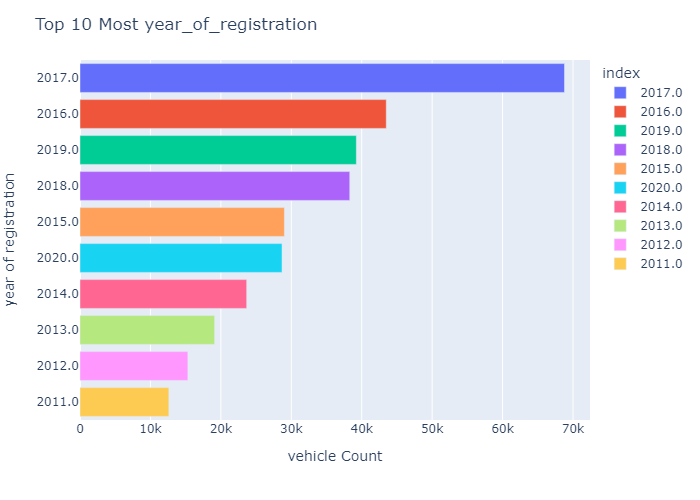

In [125]:
year_of_registration = df['year_of_registration'].value_counts().head(10)
year_of_registration.index = year_of_registration.index.astype('string')
fig = px.bar(year_of_registration,
             x=year_of_registration.values,
             y=year_of_registration.index,
             color=year_of_registration.index,
             template = 'plotly',
             height = 500,
            width = 700
            )

fig.update_layout(
    title = 'Top 10 Most year_of_registration',
    xaxis_title = 'vehicle Count',
    yaxis_title = 'year of registration'
)
   
fig.show(renderer='png')

**INSIGHT:**
- Most of the vehicles were registarted in 2017

#### price

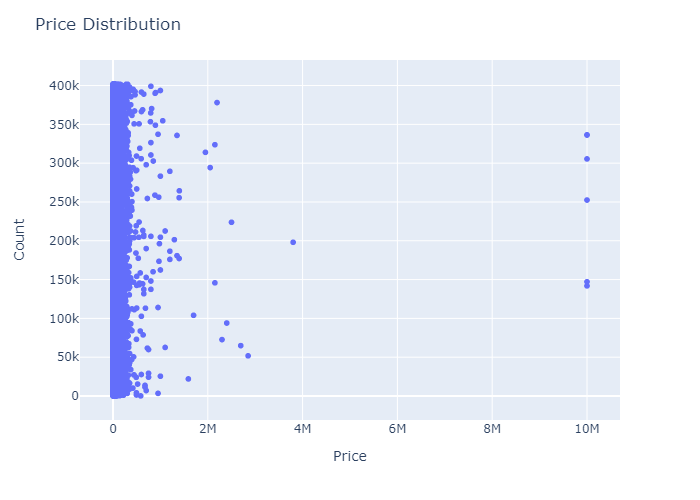

In [126]:
# Visualize Price distribution
fig = px.scatter(df, x='price')

fig.update_layout(
    title = 'Price Distribution',
    xaxis_title = 'Price',
    yaxis_title = 'Count'
)
   
fig.show(renderer='png')

**INSIGHT:**
- Possible outliers approaching 10M
- Most cars are below 500,000

#### body_type

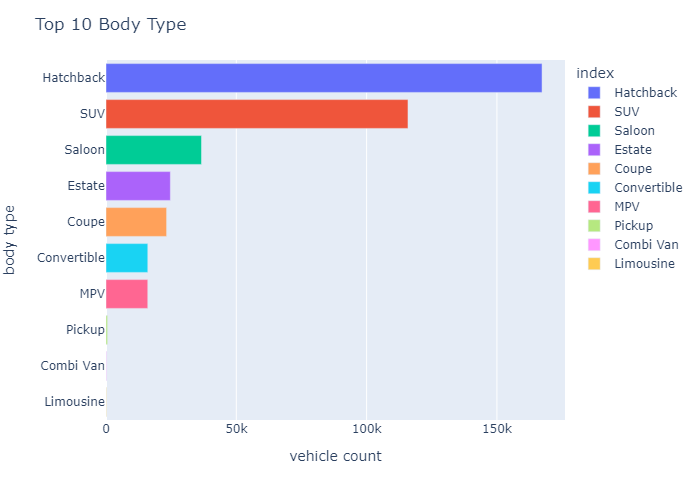

In [127]:
body_type = df['body_type'].value_counts()[:10]
fig = px.bar(body_type,
             x='body_type',
             y=body_type.index,
             color=body_type.index,
             template = 'plotly',
             height = 500,
            width = 700
            )

fig.update_layout(
    title = 'Top 10 Body Type',
    xaxis_title = 'vehicle count',
    yaxis_title = 'body type'
)
   
fig.show(renderer='png')

**INSIGHT:**
- Hatchback and SUV are the most popular body type of vehicle in the dataset

#### crossover_car_and_van

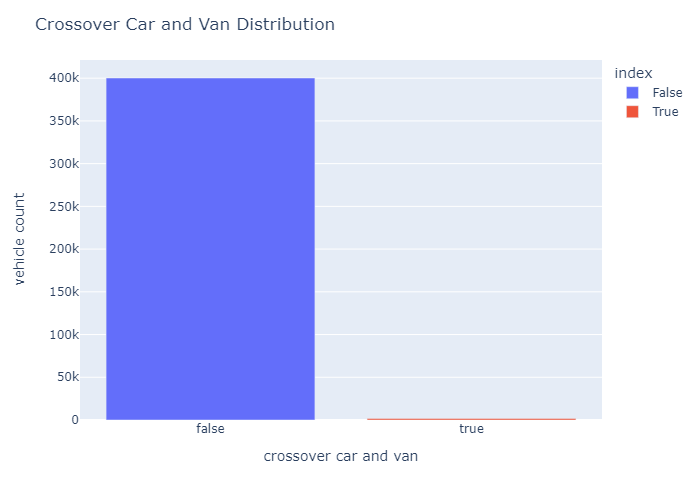

In [128]:
crossover_car_and_van = df['crossover_car_and_van'].value_counts()
fig = px.bar(crossover_car_and_van,
             y='crossover_car_and_van',
             x=crossover_car_and_van.index,
             color=crossover_car_and_van.index,
             template = 'plotly',
             height = 500,
            width = 700
            )

fig.update_layout(
    title = 'Crossover Car and Van Distribution',
    yaxis_title = 'vehicle count',
    xaxis_title = 'crossover car and van'
)
   
fig.show(renderer='png')

**INSIGHT:**
- Majority of the vehicles are not crossover car and van

#### fuel_type

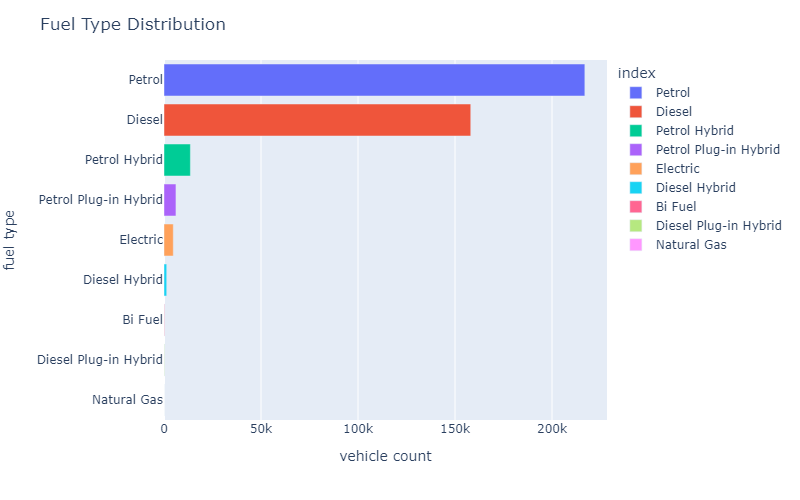

In [129]:
fuel_type = df['fuel_type'].value_counts()
fig = px.bar(fuel_type,
             x='fuel_type',
             y=fuel_type.index,
             color=fuel_type.index,
             template = 'plotly',
             height = 500,
            width = 800
            )

fig.update_layout(
    title = 'Fuel Type Distribution',
    xaxis_title = 'vehicle count',
    yaxis_title = 'fuel type'
)
   
fig.show(renderer='png')

**INSIGHT:**
- Petrol and Diesel are the top most popular fuel type used by vehicles in the dataset

### Some Data Exploration Results
- Erroneous values(9999999):
- Missing values in standard_colour, fuel_type, body_type, reg_code and year_of_registration.
- Drop unnecessary columns public_reference, reg_code.
- Where vehicle_condition == 'NEW' , year_of_registration == 'NaN'
- The dataset was collected in the year 2020 so it is only fair to replace New vehicles with year_of_registration = NaN with 2020.
- The price range of cars in the dataset is between 120.0 and 999999.0
- year_of_registration is in float instead of int.
- There are 22 unique standard colour with Black being the majority
- There are 110 unique standard make and BMW being the majority
- USED cars are the majority
- Petrol powered vehicles are the majority
- year_of_registration has values lesser than "1800"

### Data Processing for Machine Learning

#### Drop Outliers

In [130]:
# set cap of mileage to 200,000
outlier_mileage = df[df['mileage'] > 200000].index.tolist()

# Dropping observed outliers
df.drop(index=outlier_mileage, inplace=True)

# set cap or press to 800,000
outlier_price = df[df['price'] > 400000].index.tolist()

# Dropping observed outliers
df.drop(index=outlier_price, inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

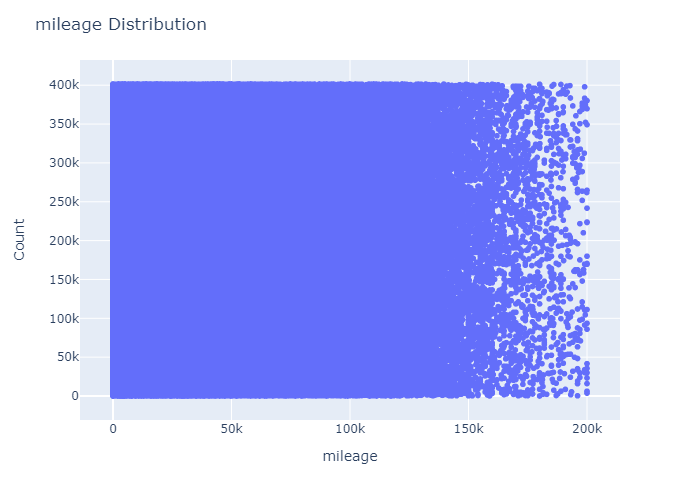

In [131]:
# Visualize mileage distribution
fig = px.scatter(df, x='mileage')

fig.update_layout(
    title = 'mileage Distribution',
    xaxis_title = 'mileage',
    yaxis_title = 'Count'
)
   
fig.show(renderer='png')

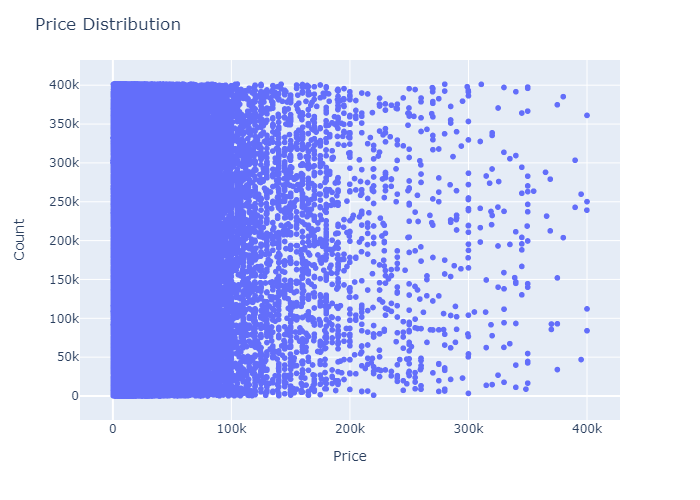

In [132]:
# Visualize Price distribution
fig = px.scatter(df, x='price')

fig.update_layout(
    title = 'Price Distribution',
    xaxis_title = 'Price',
    yaxis_title = 'Count'
)
   
fig.show(renderer='png')

In [133]:
idx_year_outliers = df[df['year_of_registration'] < 1800].index.tolist()

# Obtain year_of_registration using similar standard_make and standard_model
for idx in idx_year_outliers:
    try:
        reg_code = df.iloc[idx]['reg_code']
        mode = df[df['reg_code'] == reg_code]['year_of_registration'].mode()[0]
        
        # fill observation with the mode
        df['year_of_registration'].iloc[idx] = mode
    except KeyError: # for values without mode continue
        continue

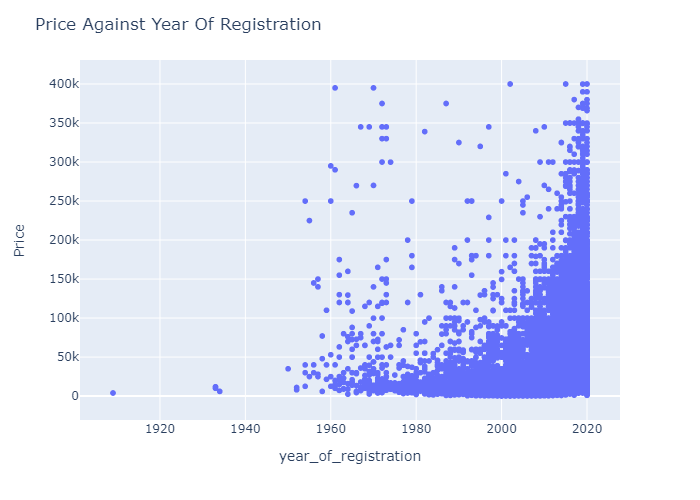

In [134]:
fig = px.scatter(df, x='year_of_registration', y='price')

fig.update_layout(
    title = 'Price Against Year Of Registration',
    yaxis_title = 'Price',
    xaxis_title = 'year_of_registration'
)
   
fig.show(renderer='png')

#### Dealing with missing values

In [135]:
df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31839
standard_colour           5357
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33296
price                        0
body_type                  815
crossover_car_and_van        0
fuel_type                  584
dtype: int64

##### Mileage

In [136]:
# Dropping null values
df.dropna(subset=['mileage'], inplace=True)
# reset index
df.reset_index(drop = True, inplace=True)

# Checking Data
df['mileage'].isnull().sum()

0

##### standard_colour

In [137]:
# Checking for null values
df['standard_colour'].isnull().sum()

5347

In [138]:
# Replace missing values with most frequent color(mode)
imp = SimpleImputer(strategy='most_frequent')
df['standard_colour'] = imp.fit_transform(df[['standard_colour']])

In [139]:
# Checking for null values
df['standard_colour'].isnull().sum()

0

##### year_of_registration
- Obtaining year_of_registration from reg_code
- Use mode of year with similar reg_code

In [140]:
# getting Index of data where vehicle_condition == 'NEW' and year_of_registration == 'NaN'
idxs = df[df['vehicle_condition'] == 'NEW']['year_of_registration'].index
# Fill NaN with 2020
df['year_of_registration'][idxs] = df['year_of_registration'][idxs].fillna(2020)
# Checking dataset
df[df['vehicle_condition'] == 'NEW']['year_of_registration'].unique()

array([2020.])

In [141]:
# Obtain indexes of reg_code.notnull()
idexs = df[df['reg_code'].notnull()].index

In [142]:
# Generating year from reg_code
for idx in idexs:
    try:
        code = df['reg_code'].iloc[idx]
        if code.startswith('0') or code.startswith('1') or code.startswith('2'):
            df['year_of_registration'].iloc[idx] = 2000 + int(code)
        elif code.startswith('5') or code.startswith('6') or code.startswith('7'):
            df['year_of_registration'].iloc[idx] = 2000 + int(code) - 50
    except AttributeError:
        #Parameter does not exist
        pass
    except ValueError:
        pass

In [143]:
# Getting index of observations with null value as year of registration
indexes = df[(df['year_of_registration'].isnull()) & (df['reg_code'].notnull())].index

# Obtain body_type using similar standard_make and standard_model
for idx in indexes:
    try:
        reg_code = df.iloc[idx]['reg_code']
        mode = df[df['reg_code'] == reg_code]['year_of_registration'].mode()[0]
        
        # fill observation with the mode
        df['year_of_registration'].iloc[idx] = mode
    except KeyError: # for values without mode continue
        continue

In [144]:
df[(df['year_of_registration'].isnull()) & (df['reg_code'].notnull())]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
9926,202010225293464,32001.0,94,Orange,Renault,Captur,USED,NaN,7400,SUV,False,Petrol
28515,202010215252376,58686.0,85,Black,Hyundai,i30,USED,NaN,6900,NaN,False,Diesel
80796,202010014455127,2000.0,CA,Green,Caterham,Seven,USED,NaN,21995,Convertible,False,Petrol
165801,202010195172029,4050.0,723xuu,Turquoise,Chevrolet,Corvette,USED,NaN,89990,NaN,False,Petrol
167194,202010225293472,55643.0,95,Grey,Citroen,DS4,USED,NaN,6800,Hatchback,False,Diesel
230857,202010225293467,61370.0,94,Black,Vauxhall,Mokka,USED,NaN,7450,NaN,False,Diesel
264985,201912315687909,23157.0,38,Black,Mercedes-Benz,E Class,USED,NaN,26550,NaN,False,Diesel
328959,202010225293425,39312.0,95,Silver,Renault,Captur,USED,NaN,8000,SUV,False,Petrol
356792,202010215252378,31487.0,37,White,Suzuki,Baleno,USED,NaN,6950,NaN,False,Petrol


In [145]:
# Checking for null values
df['year_of_registration'].isnull().sum()

308

In [146]:
# Dropping null values
df.dropna(subset=['year_of_registration'], inplace=True)
# reset index
df.reset_index(drop=True, inplace=True)

# Checking Data
df['year_of_registration'].isnull().sum()

0

In [147]:
# Converting year_of_registration from float to int
df['year_of_registration'] = df['year_of_registration'].astype(int)
#Checking dtype
df['year_of_registration'].dtype

dtype('int32')

##### body_type

In [148]:
# Getting index of null body_type observations
body_type_null_indexes = df[df['body_type'].isnull()].index.tolist()

In [149]:
# Obtain body_type using similar standard_make and standard_model
for idx in body_type_null_indexes:
    try:
        standard_make = df.iloc[idx]['standard_make']
        standard_model = df.iloc[idx]['standard_model']
        mode = df[(df['standard_make'] == standard_make) & (df['standard_model'] == standard_model)]['body_type'].mode()[0]
        df['body_type'].iloc[idx] = mode
    except KeyError:
        continue

In [150]:
# Dropping null values
df.dropna(subset=['body_type'], inplace=True)
# reset index
df.reset_index(drop = True, inplace=True)

# Checking Data
df['body_type'].isnull().sum()

0

##### fuel_type

In [151]:
df[df['fuel_type'].isnull()]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1306,202010305621511,10.0,NaN,Black,BMW,5 Series,NEW,2020,51395,Estate,False,NaN
2054,202003128359933,0.0,NaN,Black,Jaguar,XF,NEW,2020,35990,Estate,False,NaN
2659,202010305598848,10.0,NaN,Grey,Volvo,V60,NEW,2020,31414,Estate,False,NaN
3714,202005129287540,61568.0,14,Silver,Toyota,Prius,USED,2014,7995,Hatchback,False,NaN
4017,202010295581781,10.0,NaN,Black,Mercedes-Benz,A Class,NEW,2020,36584,Hatchback,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
396774,202007301903022,3881.0,20,Orange,Dacia,Duster,USED,2020,12989,SUV,False,NaN
397942,202010074730787,0.0,NaN,Black,Jaguar,XF,NEW,2020,32585,Saloon,False,NaN
398079,202010315654843,1.0,NaN,Black,Peugeot,508,NEW,2020,39135,Hatchback,False,NaN
398809,202009033258549,10.0,NaN,Black,Vauxhall,Grandland X,NEW,2020,31190,SUV,False,NaN


In [152]:
# Getting index of null fuel_type observations
fuel_type_null_indexes = df[df['fuel_type'].isnull()].index.tolist()

In [153]:
# Obtain body_type using similar standard_make and standard_model
for idx in fuel_type_null_indexes:
    try:
        standard_make = df.iloc[idx]['standard_make']
        standard_model = df.iloc[idx]['standard_model']
        mode = df[(df['standard_make'] == standard_make) & (df['standard_model'] == standard_model)]['fuel_type'].mode()[0]
        df['fuel_type'].iloc[idx] = mode
    except KeyError:
        continue

In [154]:
df[df['fuel_type'].isnull()]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
64261,202009203984920,80110.0,65,Black,Lexus,RX Unspecified,USED,2015,16999,Estate,False,NaN
78584,202007291834731,49000.0,03,Green,Hyundai,Galloper,USED,2003,3995,SUV,False,NaN
170511,202008042088621,252.0,NaN,White,Mercedes-Benz,190 SL,USED,1957,149990,Convertible,False,NaN
254846,202002257692433,69938.0,62,Gold,Lexus,RX Unspecified,USED,2012,16273,SUV,False,NaN
314563,202006260556576,70000.0,58,Silver,Toyota,Emina,USED,2008,6995,MPV,False,NaN


In [155]:
# Dropping null values
df.dropna(subset=['fuel_type'], inplace=True)
# reset index
df.reset_index(drop = True, inplace=True)

# Checking Data
df['fuel_type'].isnull().sum()

0

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401070 entries, 0 to 401069
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401070 non-null  int64  
 1   mileage                401070 non-null  float64
 2   reg_code               369547 non-null  object 
 3   standard_colour        401070 non-null  object 
 4   standard_make          401070 non-null  object 
 5   standard_model         401070 non-null  object 
 6   vehicle_condition      401070 non-null  object 
 7   year_of_registration   401070 non-null  int32  
 8   price                  401070 non-null  int64  
 9   body_type              401070 non-null  object 
 10  crossover_car_and_van  401070 non-null  bool   
 11  fuel_type              401070 non-null  object 
dtypes: bool(1), float64(1), int32(1), int64(2), object(7)
memory usage: 32.5+ MB


#### Features Selection
> In this section, we would select and visualize predictor features.

##### mileage

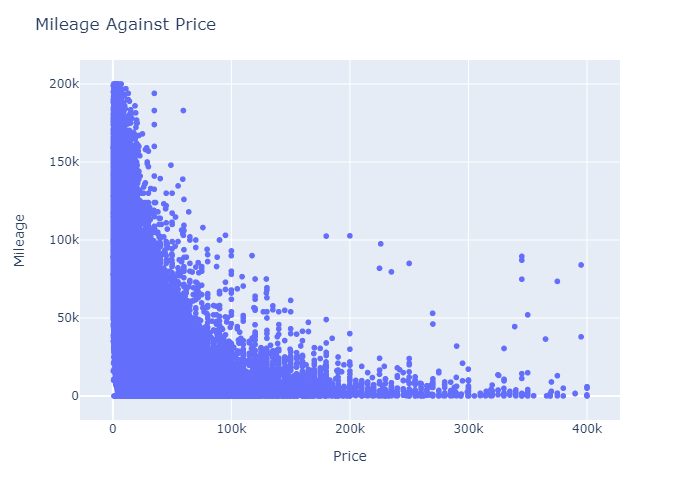

In [157]:
fig = px.scatter(df, y='mileage', x='price')

fig.update_layout(
    title = 'Mileage Against Price',
    xaxis_title = 'Price',
    yaxis_title = 'Mileage'
)
   
fig.show(renderer='png')

**INSIGHT:**
- You can see that all of the highly priced vehicle has relatively low mileage and vice versa

##### standard_colour

In [ ]:
dataa = [y_test, y_predict]
group_labels = ['y_test', 'y_predict']
fig = ff.create_distplot(dataa, group_labels, show_hist=False, show_rug=False)

fig.update_layout(
    title = 'Random Forest Regressor',
    xaxis_title = 'Price',
    yaxis_title = 'count',
    height = 650,
    width = 700
)

fig.show(renderer='png')

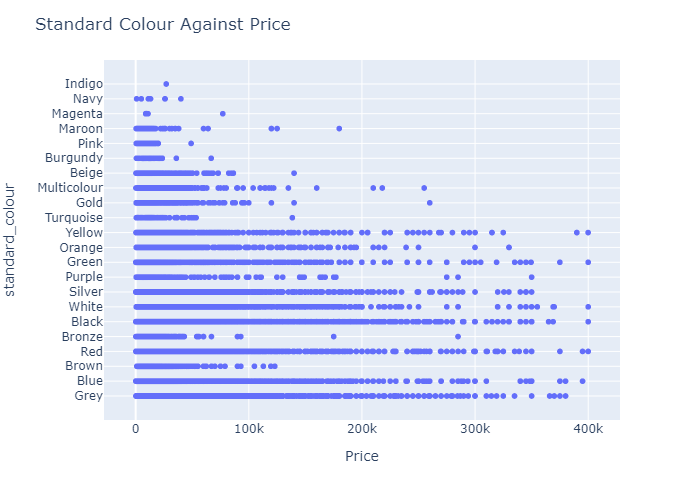

In [158]:
fig = px.scatter(df, y='standard_colour', x='price')

fig.update_layout(
    title = 'Standard Colour Against Price',
    xaxis_title = 'Price',
    yaxis_title = 'standard_colour'
)
   
fig.show(renderer='png')

##### standard_make

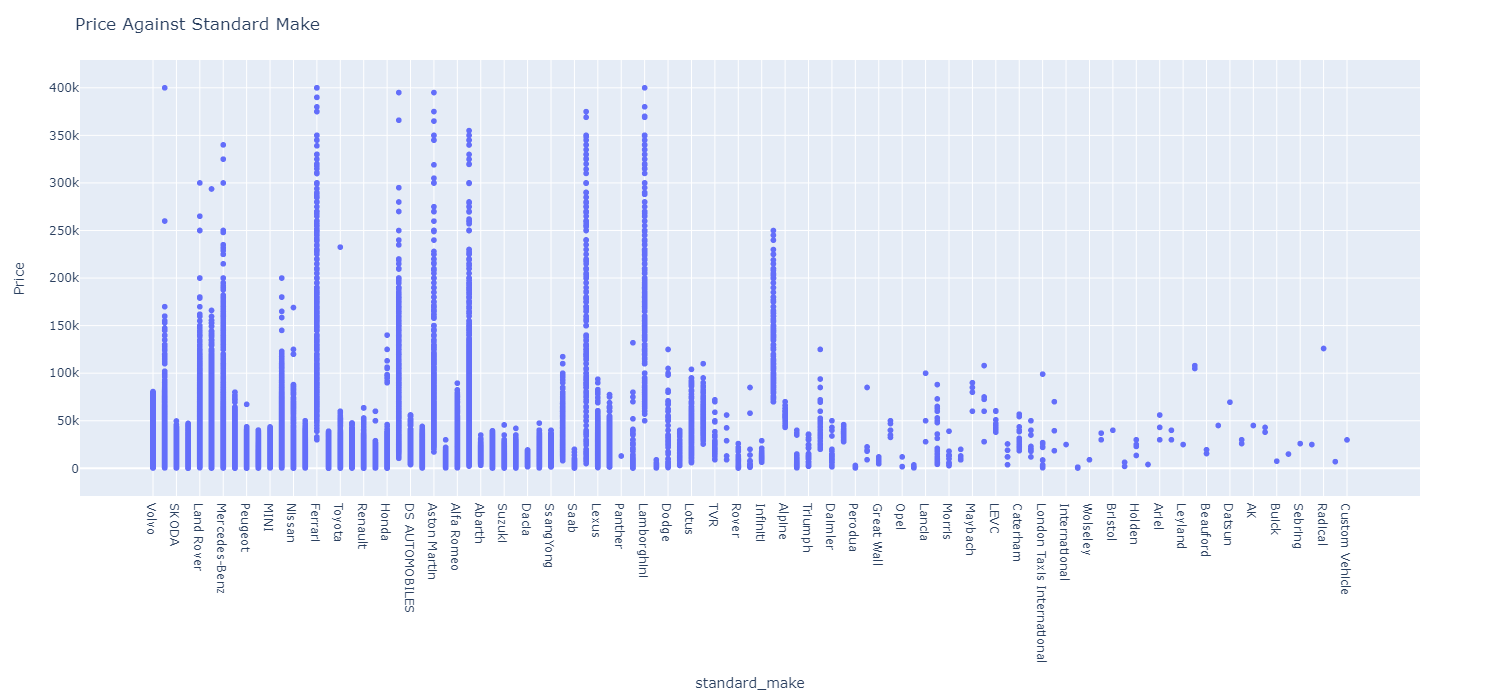

In [159]:
fig = px.scatter(df, x='standard_make', y='price')

fig.update_layout(
    title = 'Price Against Standard Make',
    yaxis_title = 'Price',
    xaxis_title = 'standard_make',
    height = 700,
    width = 1500,
)
   
fig.show(renderer='png')

##### standard_model

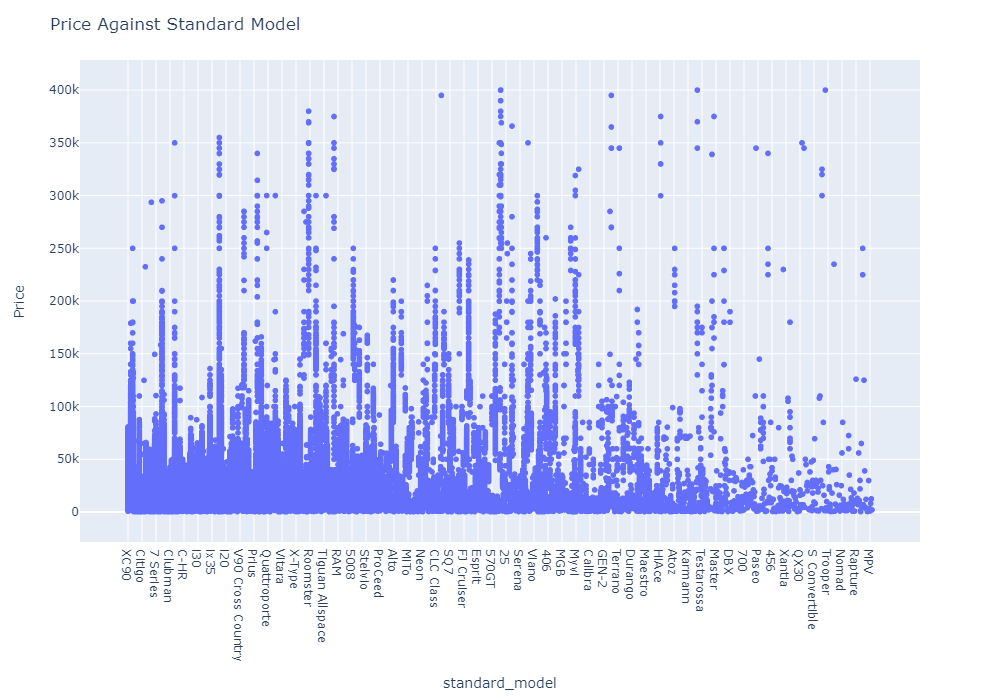

In [160]:
fig = px.scatter(df, x='standard_model', y='price')

fig.update_layout(
    title = 'Price Against Standard Model',
    yaxis_title = 'Price',
    xaxis_title = 'standard_model',
    height = 700,
    width = 1000,
)
   
fig.show(renderer='png')

##### vehicle_condition

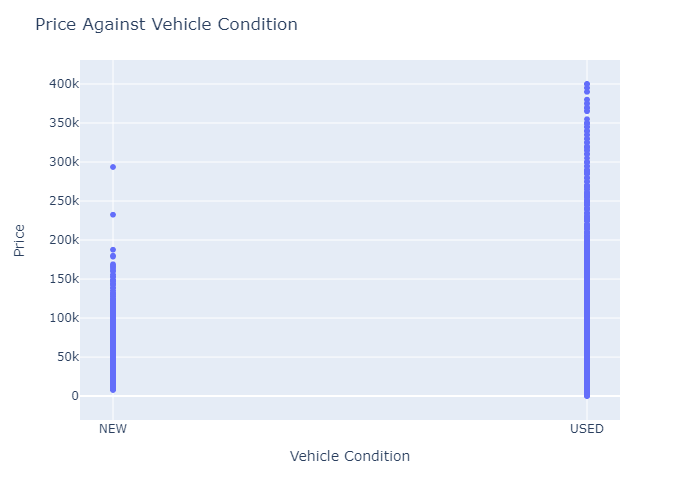

In [161]:
fig = px.scatter(df, x='vehicle_condition', y='price')

fig.update_layout(
    title = 'Price Against Vehicle Condition',
    yaxis_title = 'Price',
    xaxis_title = 'Vehicle Condition'
)
   
fig.show(renderer='png')

##### year_of_registration

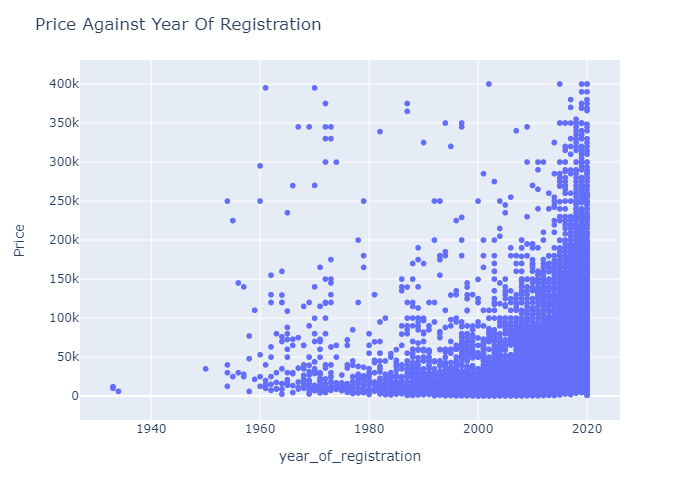

In [162]:
fig = px.scatter(df, x='year_of_registration', y='price')

fig.update_layout(
    title = 'Price Against Year Of Registration',
    yaxis_title = 'Price',
    xaxis_title = 'year_of_registration'
)
   
fig.show(renderer='png')

##### body_type

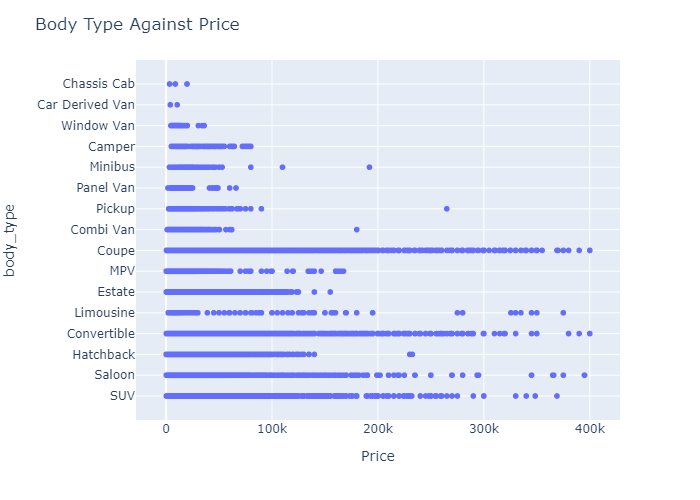

In [163]:
fig = px.scatter(df, y='body_type', x='price')

fig.update_layout(
    title = 'Body Type Against Price',
    xaxis_title = 'Price',
    yaxis_title = 'body_type'
)
   
fig.show(renderer='png')

**INSIGHT:**
- Vehicles with price above 1.5m are either Coupe or Convertible 

##### crossover_car_and_van

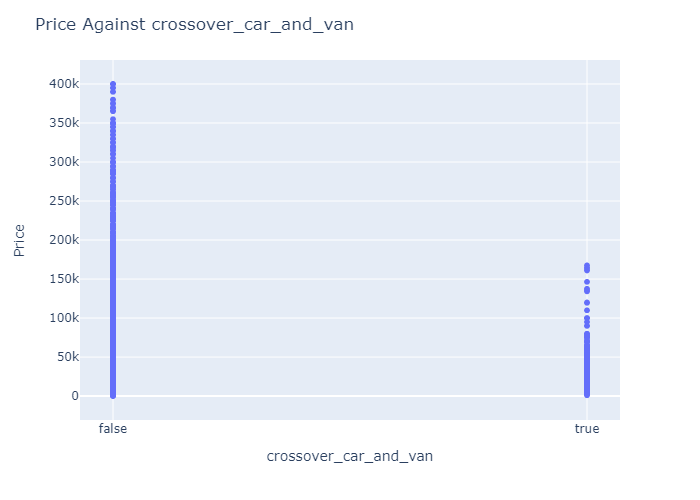

In [164]:
fig = px.scatter(df, x='crossover_car_and_van', y='price')

fig.update_layout(
    title = 'Price Against crossover_car_and_van',
    yaxis_title = 'Price',
    xaxis_title = 'crossover_car_and_van'
)
   
fig.show(renderer='png')

##### fuel_type

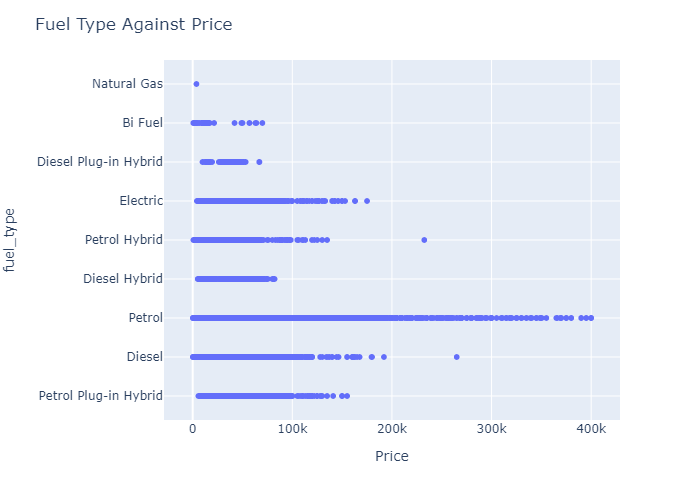

In [165]:
fig = px.scatter(df, y='fuel_type', x='price')

fig.update_layout(
    title = 'Fuel Type Against Price',
    xaxis_title = 'Price',
    yaxis_title = 'fuel_type'
)
   
fig.show(renderer='png')

**INSIGHT:**
- Vehicles with higher prices are petrol driven vehicles

#### `Features Selection Results`
The Features we would use to build our model include
- mileage
- standard_make
- standard_model
- vehicle_condition
- year_of_registration
- body_type
- crossover_car_and_van
- fuel_type
- price(target)

#### Splitting Data into Predictor and Target

In [166]:
# Splitting Data into x and y i.e predictors and target
x = df.drop(['public_reference', 'reg_code', 'standard_colour', 'price'], axis=1)
y = df['price']

In [167]:
x

,mileage,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type
0,0.0,Volvo,XC90,NEW,2020,SUV,False,Petrol Plug-in Hybrid
1,108230.0,Jaguar,XF,USED,2011,Saloon,False,Diesel
2,7800.0,SKODA,Yeti,USED,2017,SUV,False,Petrol
3,45000.0,Vauxhall,Mokka,USED,2016,Hatchback,False,Diesel
4,64000.0,Land Rover,Range Rover Sport,USED,2014,SUV,False,Diesel
...,...,...,...,...,...,...,...,...
401065,5179.0,Peugeot,208,USED,2019,Hatchback,False,Petrol
401066,110000.0,Peugeot,107,USED,2009,Hatchback,False,Petrol
401067,52760.0,Nissan,Qashqai,USED,2012,SUV,False,Petrol
401068,10250.0,Abarth,595,USED,2015,Hatchback,False,Petrol


In [168]:
y

0         73970
1          7000
2         14000
3          7995
4         26995
          ...  
401065    10595
401066     2000
401067     7250
401068    11490
401069    20520
Name: price, Length: 401070, dtype: int64

#### categorical-encode

In [169]:
from sklearn.preprocessing import LabelEncoder

##### Label encoding on categorical features

In [170]:
categorical_features = ['standard_make', 'standard_model', 'body_type', 'fuel_type']
binary_features = ['vehicle_condition', 'crossover_car_and_van']
numeric_features = ['mileage', 'year_of_registration']

In [171]:
encode = LabelEncoder()

def label_encode(data, features):
    data[features] = encode.fit_transform(data[features])
    return data

# Label Encoding binary columns
for col in categorical_features:
    x = label_encode(x, col)

    
# Checking Result
x[categorical_features].sample(5)

,standard_make,standard_model,body_type,fuel_type
368081,7,169,7,1
370287,97,651,9,6
61503,7,169,7,1
42228,73,63,7,6
78020,19,518,9,1


##### One hot encoding on binary features 

In [172]:
# Vehicle condition
x['vehicle_condition'][x['vehicle_condition'] == 'NEW'] = 1
x['vehicle_condition'][x['vehicle_condition'] == 'USED'] = 0

# Convert datatype to int
x['vehicle_condition'] = x['vehicle_condition'].astype(int)

##### Convert boolean column `crossover_car_and_van` to int

In [173]:
x['crossover_car_and_van'] = x['crossover_car_and_van'].astype(int)
x['crossover_car_and_van']

0         0
1         0
2         0
3         0
4         0
         ..
401065    0
401066    0
401067    0
401068    0
401069    0
Name: crossover_car_and_van, Length: 401070, dtype: int32

In [174]:
x

,mileage,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type
0,0.0,99,1056,1,2020,13,0,8
1,108230.0,44,1059,0,2011,14,0,1
2,7800.0,85,1079,0,2017,13,0,6
3,45000.0,97,666,0,2016,7,0,1
4,64000.0,51,790,0,2014,13,0,1
...,...,...,...,...,...,...,...,...
401065,5179.0,73,40,0,2019,7,0,6
401066,110000.0,73,6,0,2009,7,0,6
401067,52760.0,68,757,0,2012,13,0,6
401068,10250.0,1,120,0,2015,7,0,6


In [175]:
# Check data types
x.dtypes

mileage                  float64
standard_make              int32
standard_model             int32
vehicle_condition          int32
year_of_registration       int32
body_type                  int32
crossover_car_and_van      int32
fuel_type                  int32
dtype: object

### Model Building 

In [176]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import plotly.figure_factory as ff
from datetime import datetime as dt

rs = 123

#### Define a function to return root-mean squared error(RMSE)

In [177]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

#### split data into training and test set

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = rs)

#### Linear Regression

In [179]:
lin_model = LinearRegression()

# Start time
start = dt.now()
# Train model
lin_model.fit(x_train, y_train)

# End time
lin_time = (dt.now() - start)
print(lin_time)

# # Make prediction
y_predict = lin_model.predict(x_test)

# score model
lin_r2 = round(r2_score(y_test, y_predict), 4)
print('r2 score: {}'.format(lin_r2))

# RMSE
lin_rmse = round(rmse(y_test, y_predict), 4)
print('RMSE: {}'.format(lin_rmse))

# MAE
lin_mae = round(mean_absolute_error(y_test, y_predict), 4)
print('MAE: {}'.format(lin_mae))

0:00:00.163665
r2 score: 0.2106
RMSE: 16389.783
MAE: 8173.2245


##### Visual Evaulation

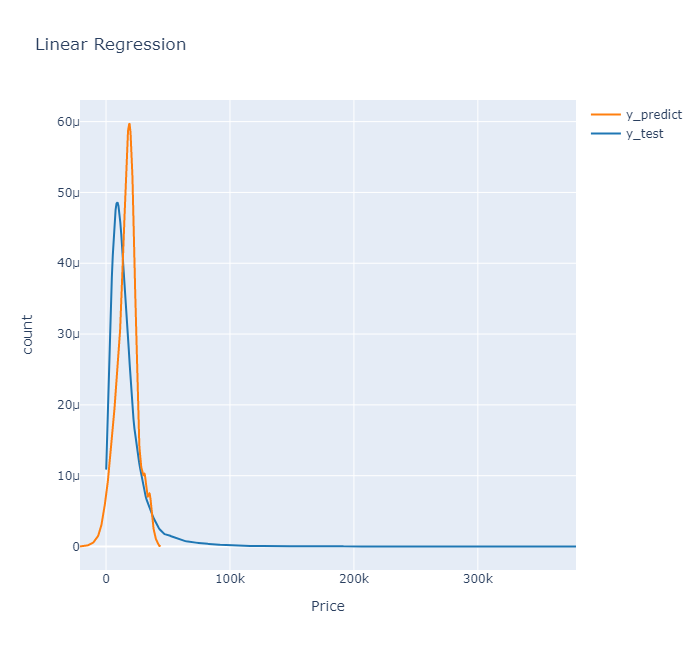

In [180]:
# Visual Evaulation
dataa = [y_test, y_predict]
group_labels = ['y_test', 'y_predict']
fig = ff.create_distplot(dataa, group_labels, show_hist=False, show_rug=False)

fig.update_layout(
    title = 'Linear Regression',
    xaxis_title = 'Price',
    yaxis_title = 'count',
    height = 650,
    width = 700
)

fig.show(renderer='png')

#### Random Forest Regressor

##### Using Grid Search

In [181]:
# Define Grid search hyperparameters for a Random Forest model
def grid_search_rf(X_train, y_train):
    params_grid = {
    'max_depth': [25, 50],
    'n_estimators': [100, 200],
    'min_samples_split': [2, 5]
    }
    rf_model = RandomForestRegressor(random_state=rs)
    grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = params_grid, 
                           scoring='r2',
                           cv = 5, verbose = 1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    mean_score = grid_search.cv_results_['mean_test_score']
    return best_params, mean_score

In [64]:
# Run grid search
# Start time
start = dt.now()

rf_bestparam, rf_mean_score = grid_search_rf(x_train, y_train)
print(rf_bestparam)

print('RF Grid Search Mean Test Score: {}'.format(rf_mean_score))

# End time
rf_gsTime = (dt.now() - start)
print('RF Grid Search Time: {}'.format(rf_gsTime))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 100}
RF Grid Search Mean Test Score: [0.6569364  0.65531679 0.65018092 0.65011809 0.65535212 0.65439748
 0.65037789 0.64986861]
RF Grid Search Time: 1:18:17.562859


##### Building Optimal Model with Grid Search Best Parameters

In [182]:
# Instantiate model
rf_model = RandomForestRegressor(n_estimators= 100, random_state= rs,
                                max_depth= 25, min_samples_split=2)

# Start time
start = dt.now()

# Train model
rf_model.fit(x_train, y_train)

# End time
rf_time = (dt.now() - start)
print('Time: {}'.format(rf_time))

# # Make prediction
y_predict = rf_model.predict(x_test)

# score model
rf_r2 = round(r2_score(y_test, y_predict), 4)
print('r2 score: {}'.format(rf_r2))

# RMSE
rf_rmse = round(rmse(y_test, y_predict), 4)
print('RMSE: {}'.format(rf_rmse))

# MAE
rf_mae = round(mean_absolute_error(y_test, y_predict), 4)
print('MAE: {}'.format(rf_mae))

Time: 0:01:36.237764
r2 score: 0.9144
RMSE: 5396.873
MAE: 2017.4993


##### Visual Evaulation

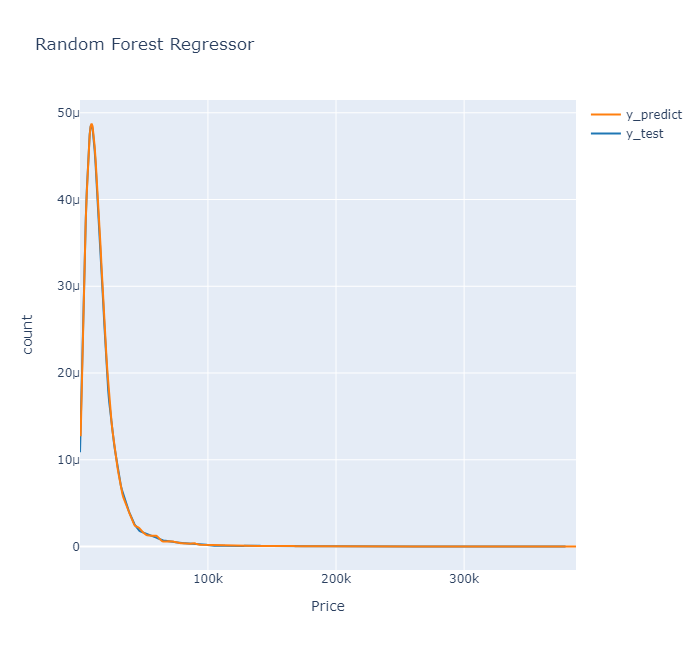

In [183]:
# Visual Evaulation
dataa = [y_test, y_predict]
group_labels = ['y_test', 'y_predict']
fig = ff.create_distplot(dataa, group_labels, show_hist=False, show_rug=False)

fig.update_layout(
    title = 'Random Forest Regressor',
    xaxis_title = 'Price',
    yaxis_title = 'count',
    height = 650,
    width = 700
)

fig.show(renderer='png')

#### Extra Tree Regressor

##### Using Grid Search

In [184]:
# Define Grid search hyperparameters for a Extra Tree Forest model
def grid_search_et(X_train, y_train):
    params_grid = {
    'max_depth': [25, 50],
    'n_estimators': [100, 200],
    'min_samples_split': [2, 5]
    }
    et_model = ExtraTreesRegressor(random_state=rs)
    grid_search = GridSearchCV(estimator = et_model, 
                           param_grid = params_grid, 
                           scoring='neg_mean_absolute_error',
                           cv = 5, verbose = 1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    mean_score = grid_search.cv_results_['mean_test_score']
    return best_params, mean_score

In [68]:
# Run grid search
# Start time
start = dt.now()

et_bestparam, et_mean_score = grid_search_et(x_train, y_train)
print(et_bestparam)

print('ET Grid Search Mean Test Score: {}'.format(et_mean_score))

# End time
et_gsTime = (dt.now() - start)
print('ET Grid Search Time: {}'.format(et_gsTime))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 200}
ET Grid Search Mean Test Score: [-2208.3134371  -2199.50784342 -2160.86549354 -2153.65853732
 -2363.76431477 -2361.80190336 -2212.17993066 -2205.46148566]
ET Grid Search Time: 0:56:28.533564


##### Building Optimal Model with Grid Search Best Parameters

In [185]:
# Instantiate model
et_model = ExtraTreesRegressor(n_estimators= 200, random_state= rs, 
                              max_depth= 25, min_samples_split=5)

# Start time
start = dt.now()

# Train model
et_model.fit(x_train, y_train)

# End time
et_time = (dt.now() - start)
print('Time: {}'.format(et_time))

# # Make prediction
y_predict = et_model.predict(x_test)

# score model
et_r2 = round(r2_score(y_test, y_predict), 4)
print('r2 score: {}'.format(et_r2))

# rmse
et_rmse = round(rmse(y_test, y_predict), 4)
print('RMSE: {}'.format(et_rmse))

# MAE
et_mae = round(mean_absolute_error(y_test, y_predict), 4)
print('MAE: {}'.format(et_mae))

Time: 0:01:45.634828
r2 score: 0.9229
RMSE: 5122.7213
MAE: 1945.5389


##### Visual Evaulation

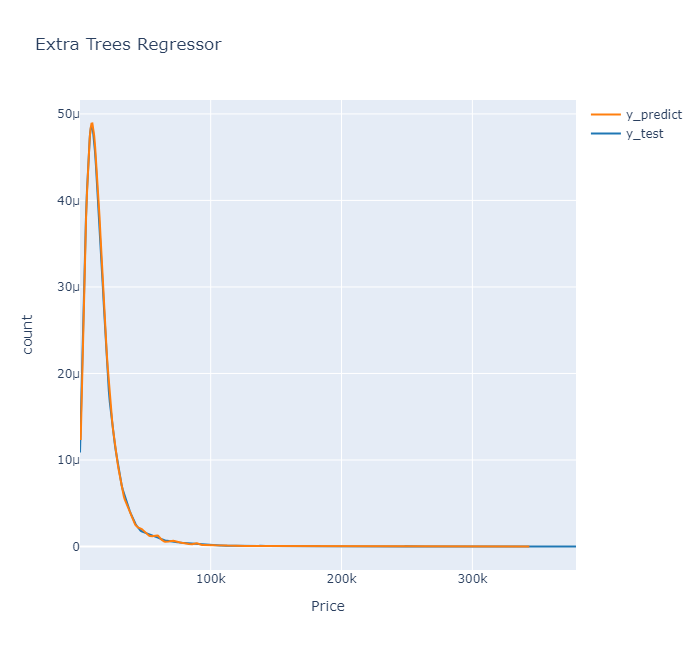

In [186]:
# Visual Evaulation
dataa = [y_test, y_predict]
group_labels = ['y_test', 'y_predict']
fig = ff.create_distplot(dataa, group_labels, show_hist=False, show_rug=False)

fig.update_layout(
    title = 'Extra Trees Regressor',
    xaxis_title = 'Price',
    yaxis_title = 'count',
    height = 650,
    width = 700
)

fig.show(renderer='png')

#### Feature Importance

In [187]:
# get the list of tuples from two lists and merge them by using zip().
list_of_tuples = list(zip(x_train.columns, et_model.feature_importances_))

# pandas Dataframe.
imp_df = pd.DataFrame(list_of_tuples,
                  columns=['Name', 'importance'])
imp_df = imp_df.sort_values(by='importance')
imp_df

,Name,importance
6,crossover_car_and_van,0.001661
3,vehicle_condition,0.044416
7,fuel_type,0.050668
4,year_of_registration,0.084628
5,body_type,0.177681
0,mileage,0.182110
2,standard_model,0.198501
1,standard_make,0.260336


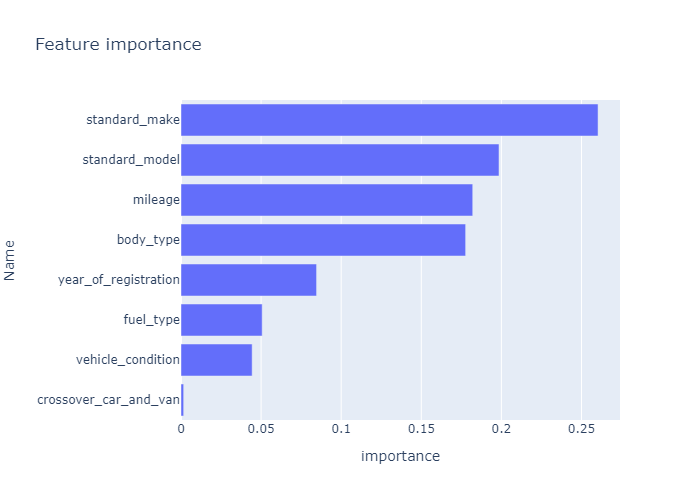

In [188]:
fig = px.bar(imp_df, y='Name', x='importance', title='Feature importance',
             height = 500, width = 700)
fig.show(renderer='png')

**INSIGHT:**
- mileage, standard_model, standard_make, body_type, year_of_registration are the top important features used in determining the car price
- crossover_car_and_van has very little influence on the model decision.

### Final Results

In [196]:
lin_results = [lin_mae, lin_rmse, lin_r2]
rf_results = [rf_mae, rf_rmse, rf_r2]
et_results = [et_mae, et_rmse, et_r2]

list_ = [lin_results, rf_results, et_results]

In [198]:
columns = ['MAE', 'RMSE', 'R2']
index = ['LinearReg', 'RandomForest', 'ExtraTrees']

In [206]:
results = pd.DataFrame(list_, columns =columns, index=index)
results = results.sort_values(by='MAE')
results

,MAE,RMSE,R2
ExtraTrees,1945.5389,5122.7213,0.9229
RandomForest,2017.4993,5396.8730,0.9144
LinearReg,8173.2245,16389.7830,0.2106
